**Import the Necessary Modules**

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

**Obtain the Dataset**

In [2]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length', 'sepal width' , 'petal length', 'petal width', 'target'])

**Preview Your Data**

In [3]:
df.head

<bound method NDFrame.head of      sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

**Perform Scaling on the Data**

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values

y = df.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

**Perform PCA**

In [5]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

**Combine the Target and the Principal Components**

In [6]:
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

**Perform a Scree Plot of the Principal Components**

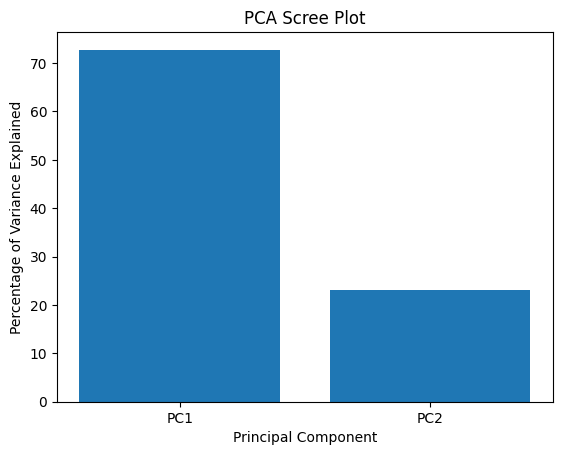

In [7]:

percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
columns = ['PC1', 'PC2']
plt.bar(x= range(1, 3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()


**Plot the Principal Components on 2D**

Text(0, 0.5, 'PC2')

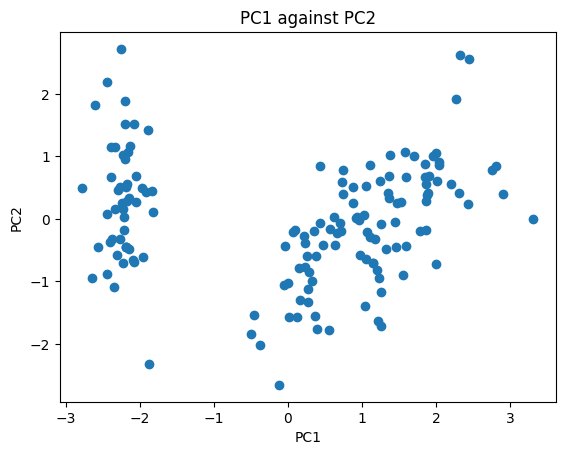

In [8]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

**Plot Of PC1 Vs. PC2**

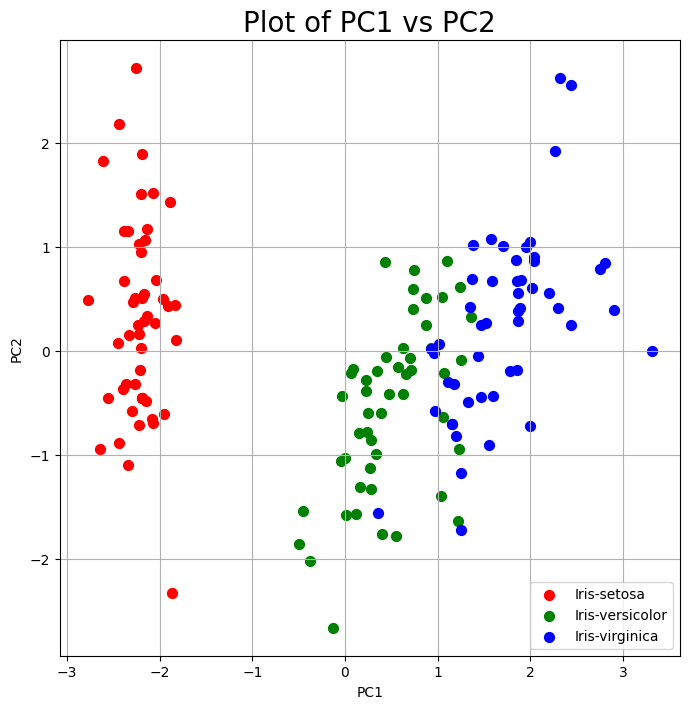

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

**Explaining the Variance Using Principal Component**

In [10]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])